# Indicators of Heavy Traffic on I-94

In this project, analysis will be performked on a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. to mention a few,

## The I-94 Traffic Dataset
John Hogue made the dataset available that wwil be worked with, which can can downloaded from [the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# reading dataset and obtaining some overseight of the headers and rows
traffic_i94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(traffic_i94.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [2]:
# additional info on dataset
print(traffic_i94.shape) # to use as reference to inspect if any missing data 
print(traffic_i94.info())
traffic_i94["date_time"].value_counts().sort_index()

(48204, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


2012-10-02 09:00:00    1
2012-10-02 10:00:00    1
2012-10-02 11:00:00    1
2012-10-02 12:00:00    1
2012-10-02 13:00:00    1
                      ..
2018-09-30 19:00:00    1
2018-09-30 20:00:00    1
2018-09-30 21:00:00    1
2018-09-30 22:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 40575, dtype: int64

The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — there is data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of this analysis will be about the westbound traffic in the proximity of the station. In other words, one should avoid generalizing the results for the entire I-94 highway.

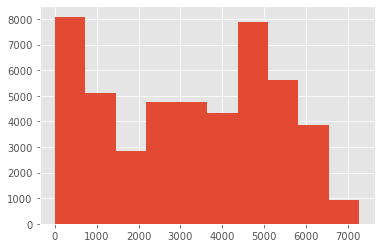

In [3]:
plt.style.use('ggplot')
traffic_i94["traffic_volume"].hist()
plt.show()

In [4]:
traffic_i94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives this analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night
Start by dividing the dataset into two parts:

Daytime data: hours from 7 AM to 7 PM (12 hours)
Nighttime data: hours from 7 PM to 7 AM (12 hours)
While this is not a perfect criterion for distinguishing between nighttime and daytime, it should be a good starting point.

In [5]:
traffic_i94["date_time"] = pd.to_datetime(traffic_i94["date_time"])

day_time = traffic_i94.copy()[(traffic_i94["date_time"].dt.hour >= 7) & (traffic_i94["date_time"].dt.hour < 19)]
print(day_time.shape)

night_time = traffic_i94.copy()[(traffic_i94["date_time"].dt.hour >= 19) | (traffic_i94["date_time"].dt.hour < 7)]
print(night_time.shape)

row_count = day_time.shape[0] + night_time.shape[0] # just to confirm no missing rows or incorrect logic followed
traffic_i94.shape[0] == row_count

(23877, 9)
(24327, 9)


True

This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

In [6]:
traffic_i94.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


## Traffic Volume: Day vs. Night (part II)
Now that the data for day and night is isolated, histograms of traffic volume side-by-side will be compared by using a grid chart.

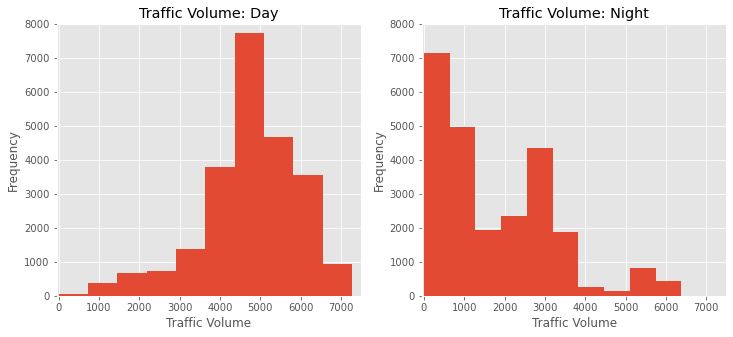

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(day_time['traffic_volume'])
plt.xlim(-50, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'])
plt.xlim(-50, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [8]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (since 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Since the goal is to find indicators of heavy traffic, the focus will only be on the daytime data moving forward.

## Time Indicators
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

A few plots will be drawn showing how the traffic volume changes according to the following:

Month
Day of the week
Time of day

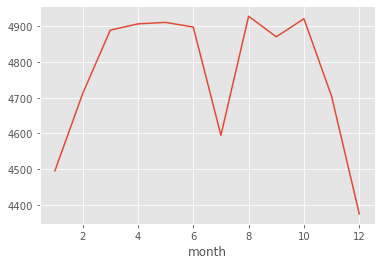

In [10]:
day_time["month"] = day_time['date_time'].dt.month
by_month = day_time.groupby("month").mean()
by_month["traffic_volume"]
by_month["traffic_volume"].plot()
plt.show()


The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

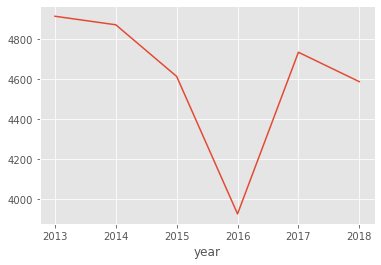

In [11]:
day_time['year'] = day_time['date_time'].dt.year
only_july = day_time[day_time['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot()
plt.show()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this [article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.

As a tentative conclusion here, one can say that warm months generally show heavier traffic compared to cold months. In a warm month, one can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators (part II)
Now to look at a more granular indicator: day number.

In [12]:
day_time["day_of_week"] = day_time["date_time"].dt.dayofweek
by_day_of_week = day_time.groupby("day_of_week").mean()
by_day_of_week["traffic_volume"]

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

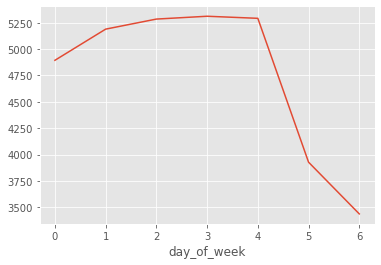

In [13]:
by_day_of_week["traffic_volume"].plot()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

## Time Indicators (part III)
Now to analyze to see values one has based on time of the day. The weekends, however, will drag down the average values, so averages will be looked at separately.

In [14]:
day_time['hour'] = day_time["date_time"].dt.hour
business_days = day_time.copy()[day_time['day_of_week'] <= 4]
weekend = day_time.copy()[day_time['day_of_week'] >= 5]
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


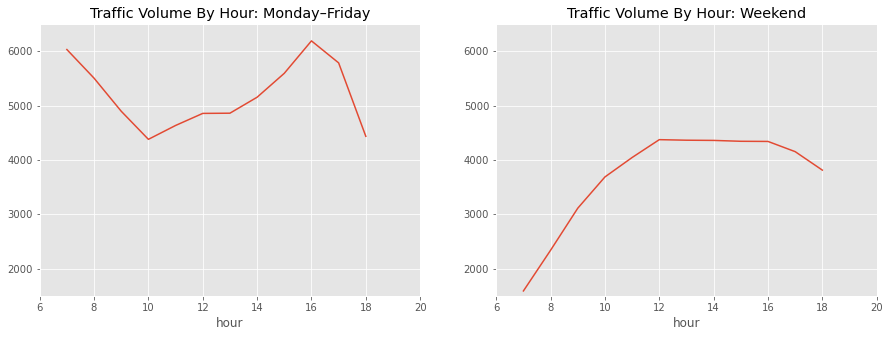

In [15]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()


At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. One can observe volumes of over 6,000 cars at rush hours.

To summarize, a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so one can start by looking at their correlation values with traffic_volume.

In [16]:
traffic_vollume_corr = day_time.corr()["traffic_volume"]
print(traffic_vollume_corr)

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64


Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Now to generate a scatter plot to visualize the correlation between temp and traffic_volume.

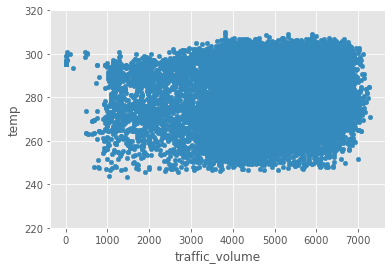

In [17]:
day_time.plot.scatter("traffic_volume", "temp")
plt.ylim(220, 320)
plt.show()

One can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Now to look at the other weather-related columns: weather_main and weather_description.

## Weather Types
To start, group the data by weather_main and look at the traffic_volume averages.

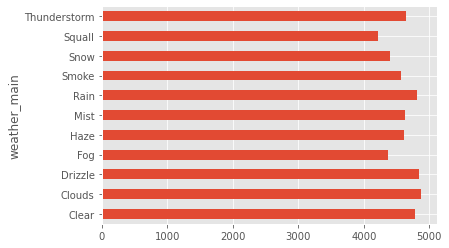

In [18]:
by_weather_main = day_time.groupby('weather_main').mean()
by_weather_main["traffic_volume"].plot.barh()
plt.show()



It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Now to group by weather_description, which has a more granular weather classification.

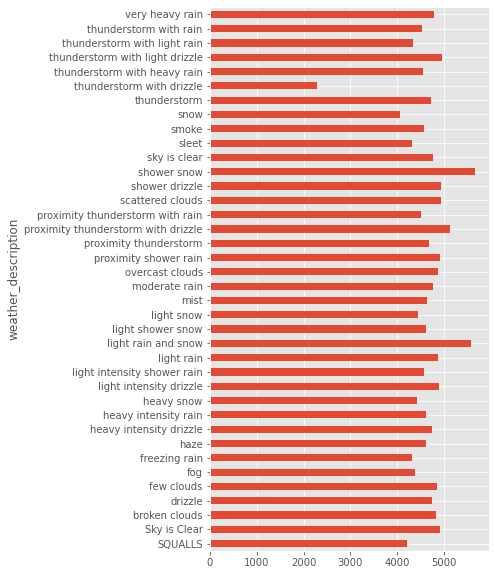

In [19]:
by_weather_description = day_time.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps one reason could be that more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion
In this project, the objective was to find a few indicators of heavy traffic on the I-94 Interstate highway. In this regard two types of indicators were found:

1. Time indicators
  - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
  - The traffic is usually heavier on business days compared to the weekends.
  - On business days, the rush hours are around 7 and 16.
2. Weather indicators
  - Shower snow
  - Light rain and snow
  - Proximity thunderstorm with drizzle